In [132]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz
from scipy import stats

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
sns.set(color_codes=True)
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier


from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score

import warnings
with open('heart.csv', 'r', newline='', encoding='ISO-8859-1') as csvfile:

    df = pd.read_csv("heart.csv", sep = ',')

In [133]:
df.head()


age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0

In [134]:
df.dtypes

age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object

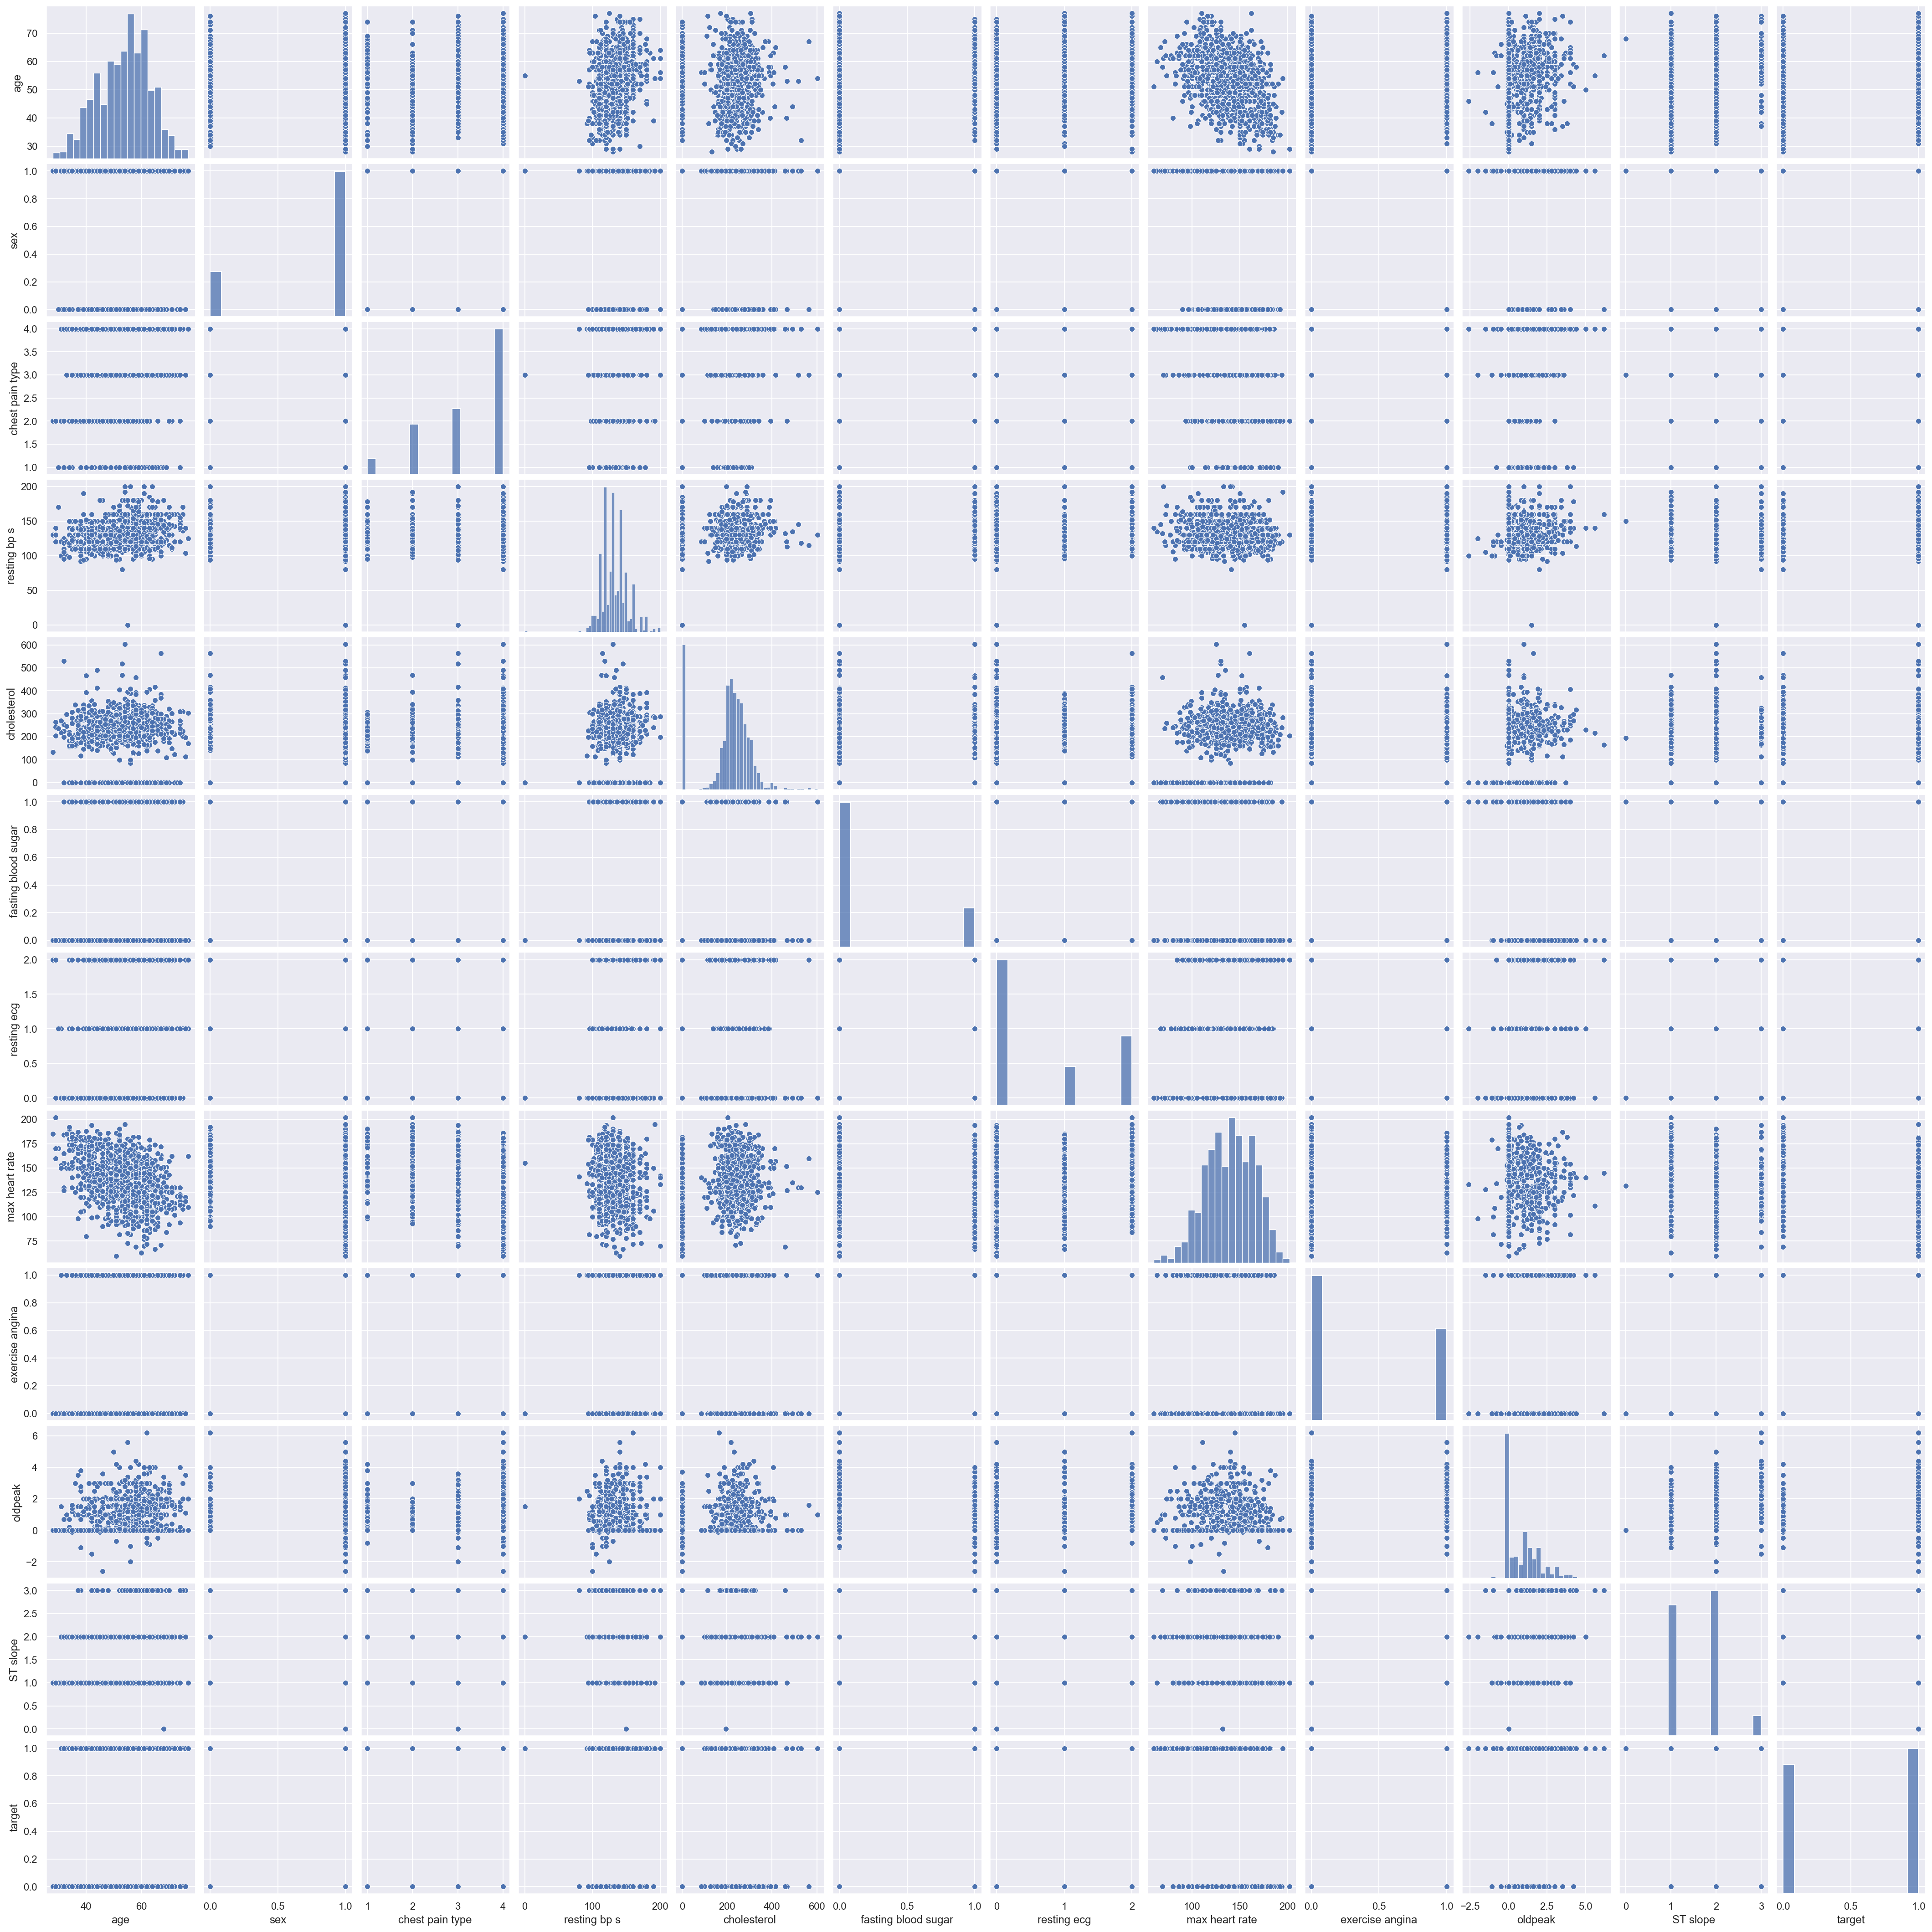

In [163]:
sns.pairplot(df)

In [135]:
df.describe()


age          sex  chest pain type  resting bp s  cholesterol  \
count  1190.000000  1190.000000      1190.000000   1190.000000  1190.000000   
mean     53.720168     0.763866         3.232773    132.153782   210.363866   
std       9.358203     0.424884         0.935480     18.368823   101.420489   
min      28.000000     0.000000         1.000000      0.000000     0.000000   
25%      47.000000     1.000000         3.000000    120.000000   188.000000   
50%      54.000000     1.000000         4.000000    130.000000   229.000000   
75%      60.000000     1.000000         4.000000    140.000000   269.750000   
max      77.000000     1.000000         4.000000    200.000000   603.000000   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
count          1190.000000  1190.000000     1190.000000      1190.000000   
mean              0.213445     0.698319      139.732773         0.387395   
std               0.409912     0.870359       25.517636         0.487360   
min               0.000000     0.000000       60.000000         0.000000   
25%               0.000000     0.000000      121.000000         0.000000   
50%               0.000000     0.000000      140.500000         0.000000   
75%               0.000000     2.000000      160.000000         1.000000   
max               1.000000     2.000000      202.000000         1.000000   

           oldpeak     ST slope       target  
count  1190.000000  1190.000000  1190.000000  
mean      0.922773     1.624370     0.528571  
std       1.086337     0.610459     0.499393  
min      -2.600000     0.000000     0.000000  
25%       0.000000     1.000000     0.000000  
50%       0.600000     2.000000     1.000000  
75%       1.600000     2.000000     1.000000  
max       6.200000     3.000000     1.000000

In [136]:
df.isnull().sum() 


age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

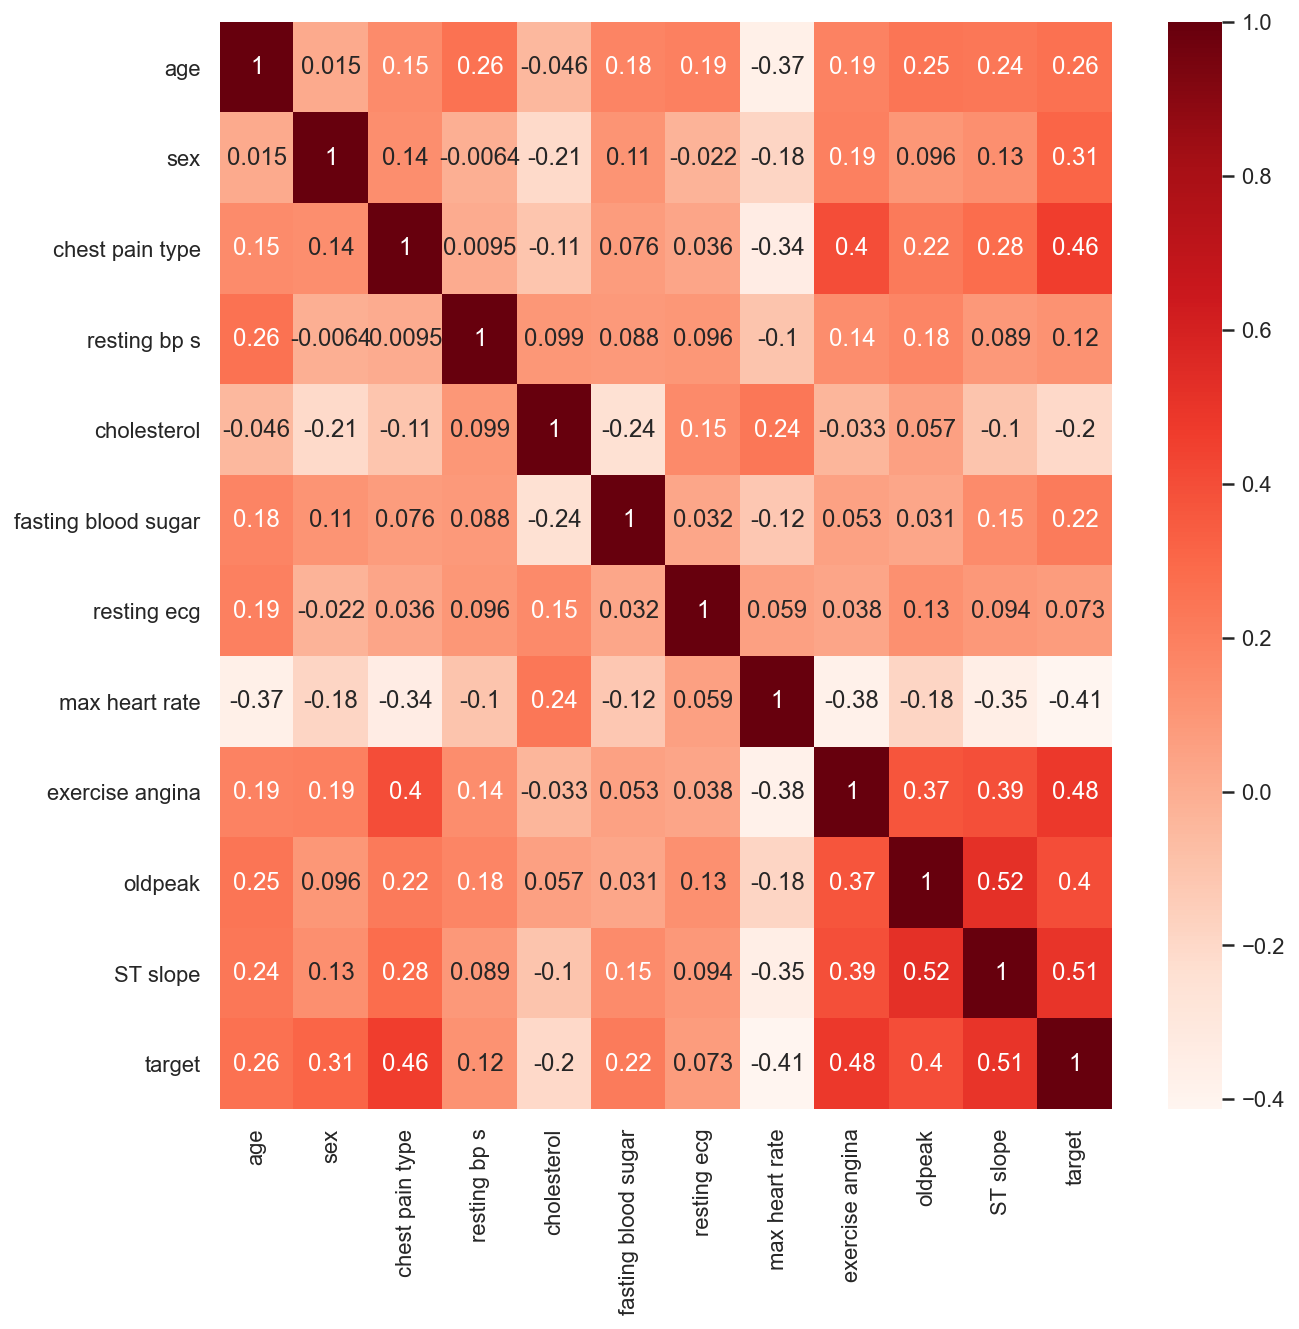

In [137]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='Reds');

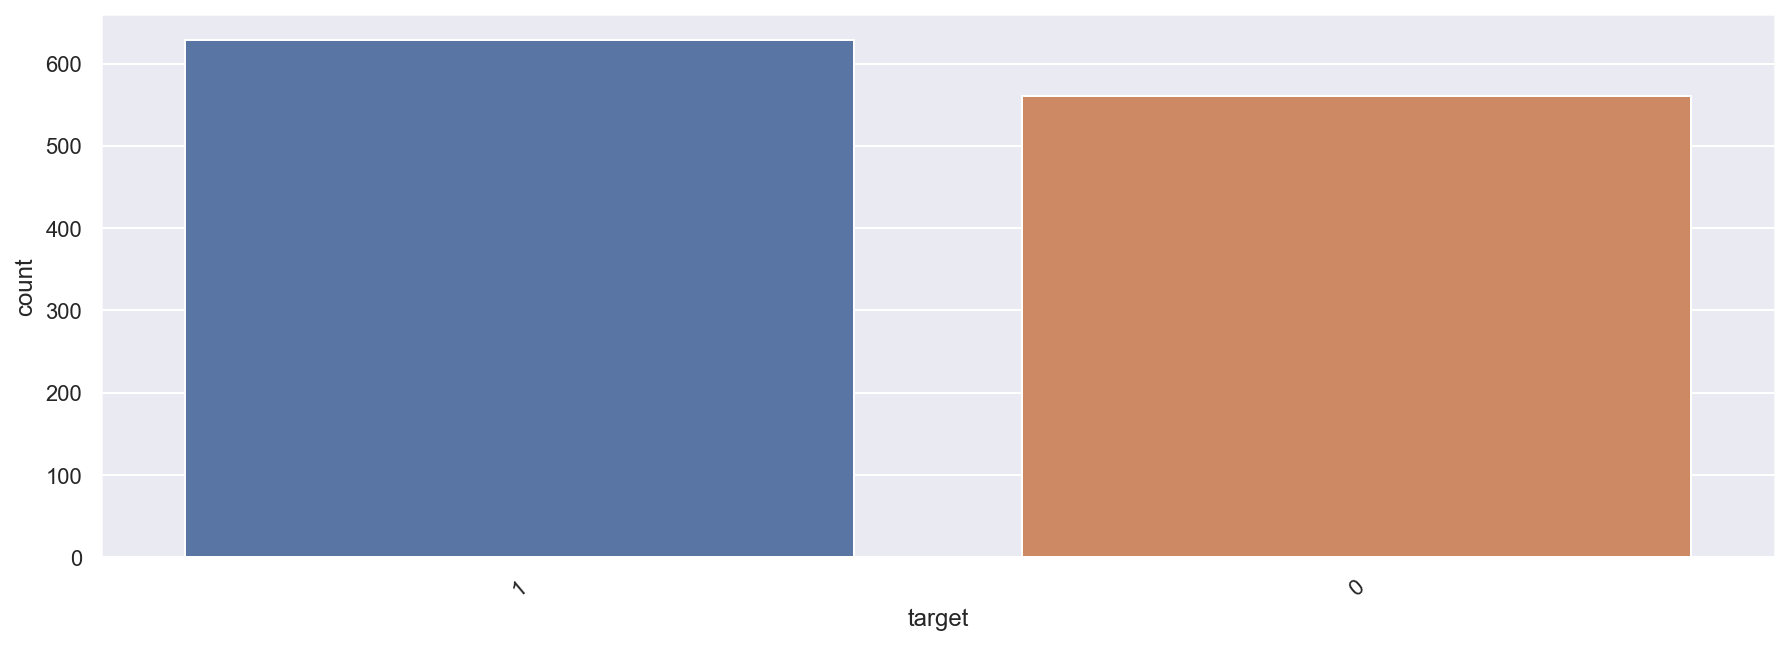

In [138]:
fig, ax = plt.subplots(figsize=(15,5))
fig = sns.countplot(x = df['target'], ax=ax, order = df['target'].value_counts().index) 
for item in fig.get_xticklabels():
    item.set_rotation(40)
    
    
   
    

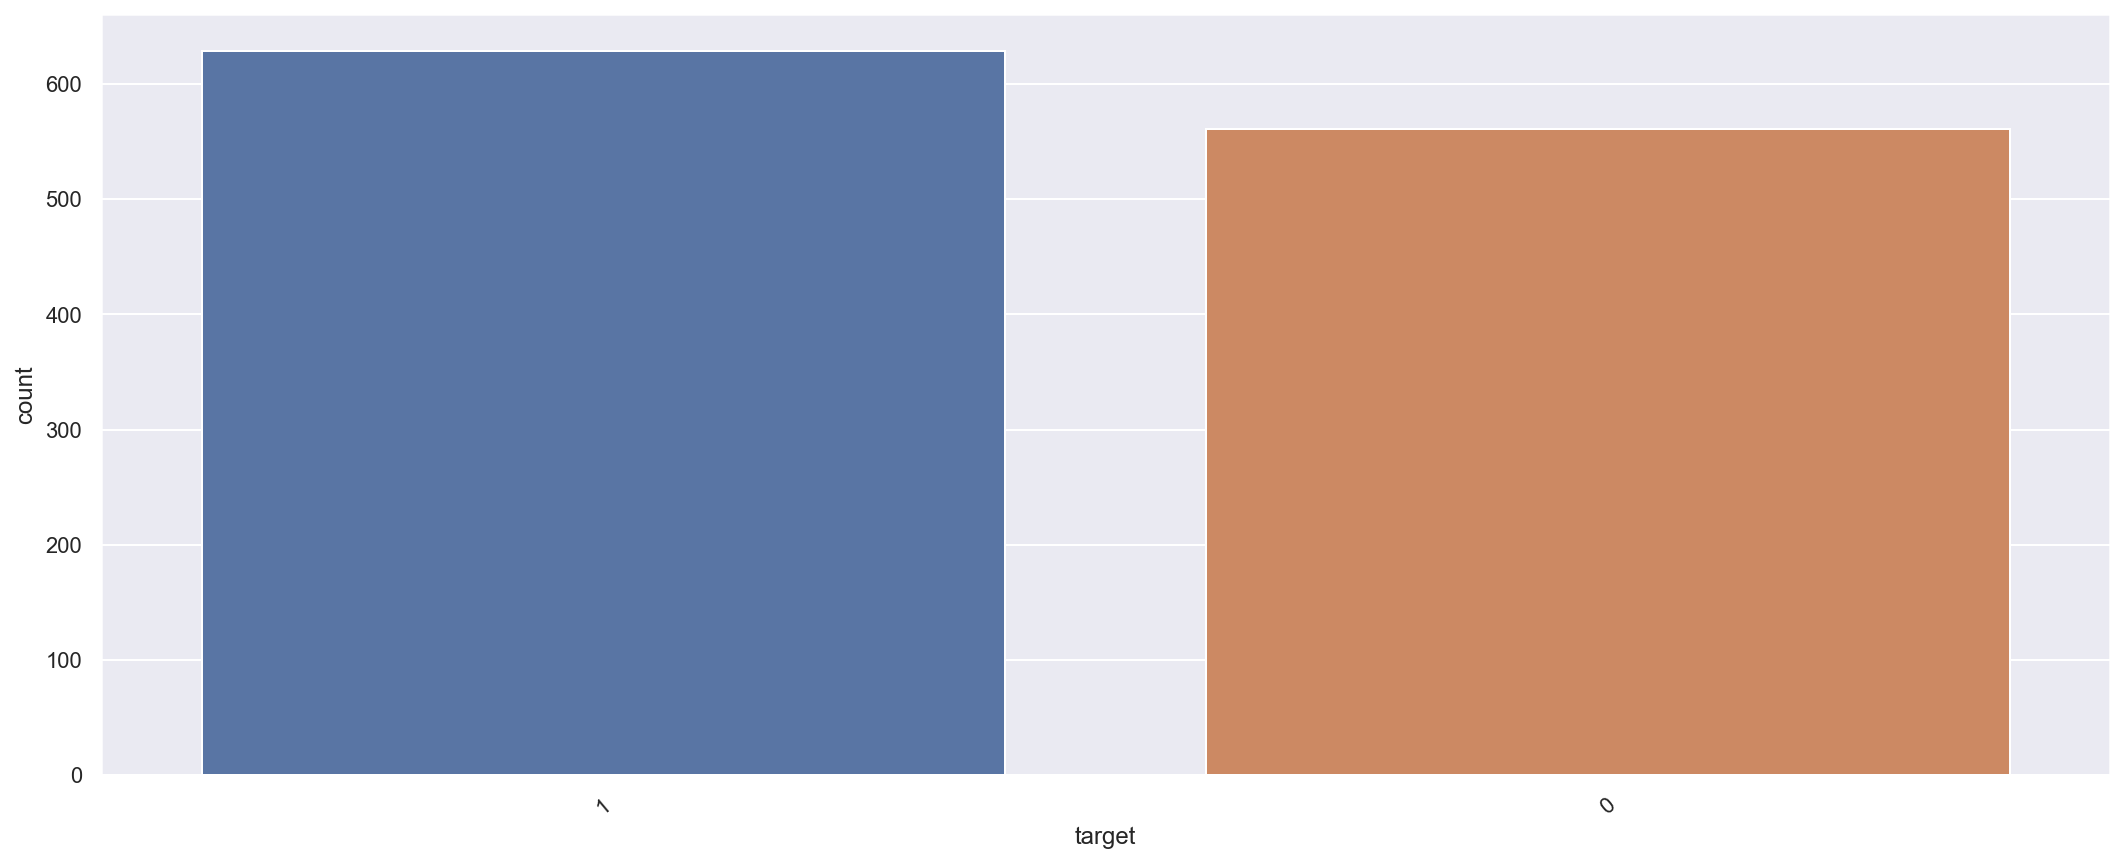

In [139]:
fig, ax = plt.subplots(figsize=(18,7))
fig = sns.countplot(x = df['target'], ax=ax, order = df['target'].value_counts().index) 
for item in fig.get_xticklabels():
    item.set_rotation(40)
    
    
    #1 male, 0 female

In [140]:
df2 = df.copy()
def chng(sex):
    if sex == 0:
        return 'Mujer'
    else:
        return 'Hombre'
df2['sex'] = df2['sex'].apply(chng)
def chng2(target):
    if target == 0:
        return 'No Ataque'
    else:
        return 'Si Ataque'
df2['target'] = df2["target"].apply(chng2)


<AxesSubplot:xlabel='sex', ylabel='count'>

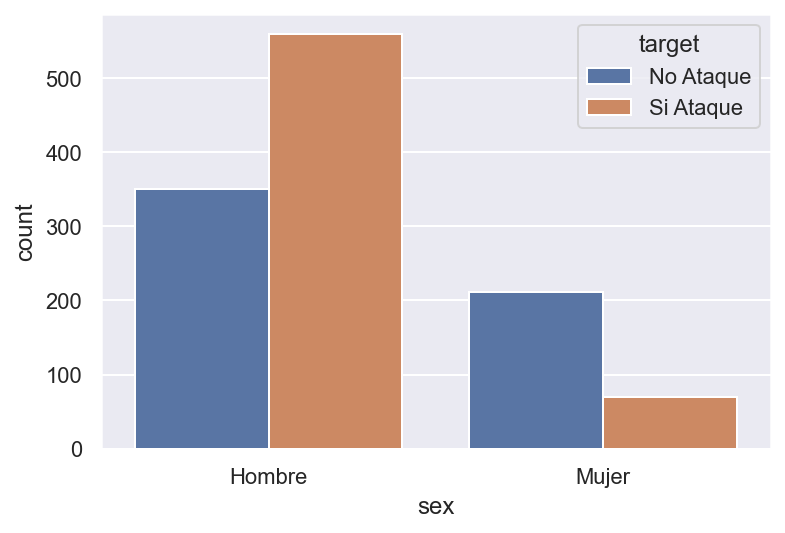

In [141]:
df['target'] = df['target'].apply(chng2)
sns.countplot(data= df2, x='sex',hue='target')


Text(0.5, 1.0, 'Género v/s Tensión\n')

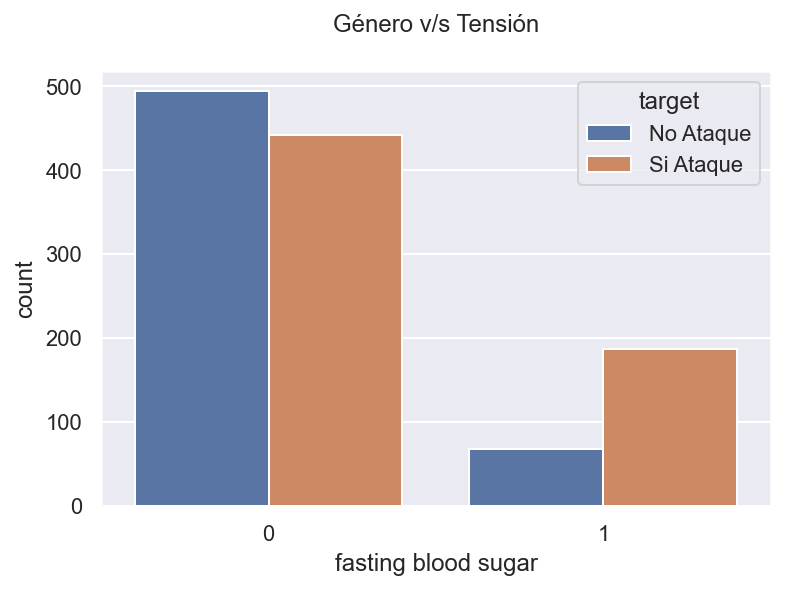

In [142]:
sns.countplot(data= df2, x='fasting blood sugar',hue='target')
plt.title('Género v/s Tensión\n')


In [143]:
def coles(cholesterol): # formula que me permite resumir los rangos de colesterol
    if (cholesterol >0 ) and (cholesterol < 150):
            return 0-150
    elif ( cholesterol >151) and (cholesterol <250):
        return 150-250
    elif (cholesterol >251) and (cholesterol < 350):
        return 250-350
    else:
        return 350
   
    
df["cholesterol"] =df["cholesterol"].apply(coles)    



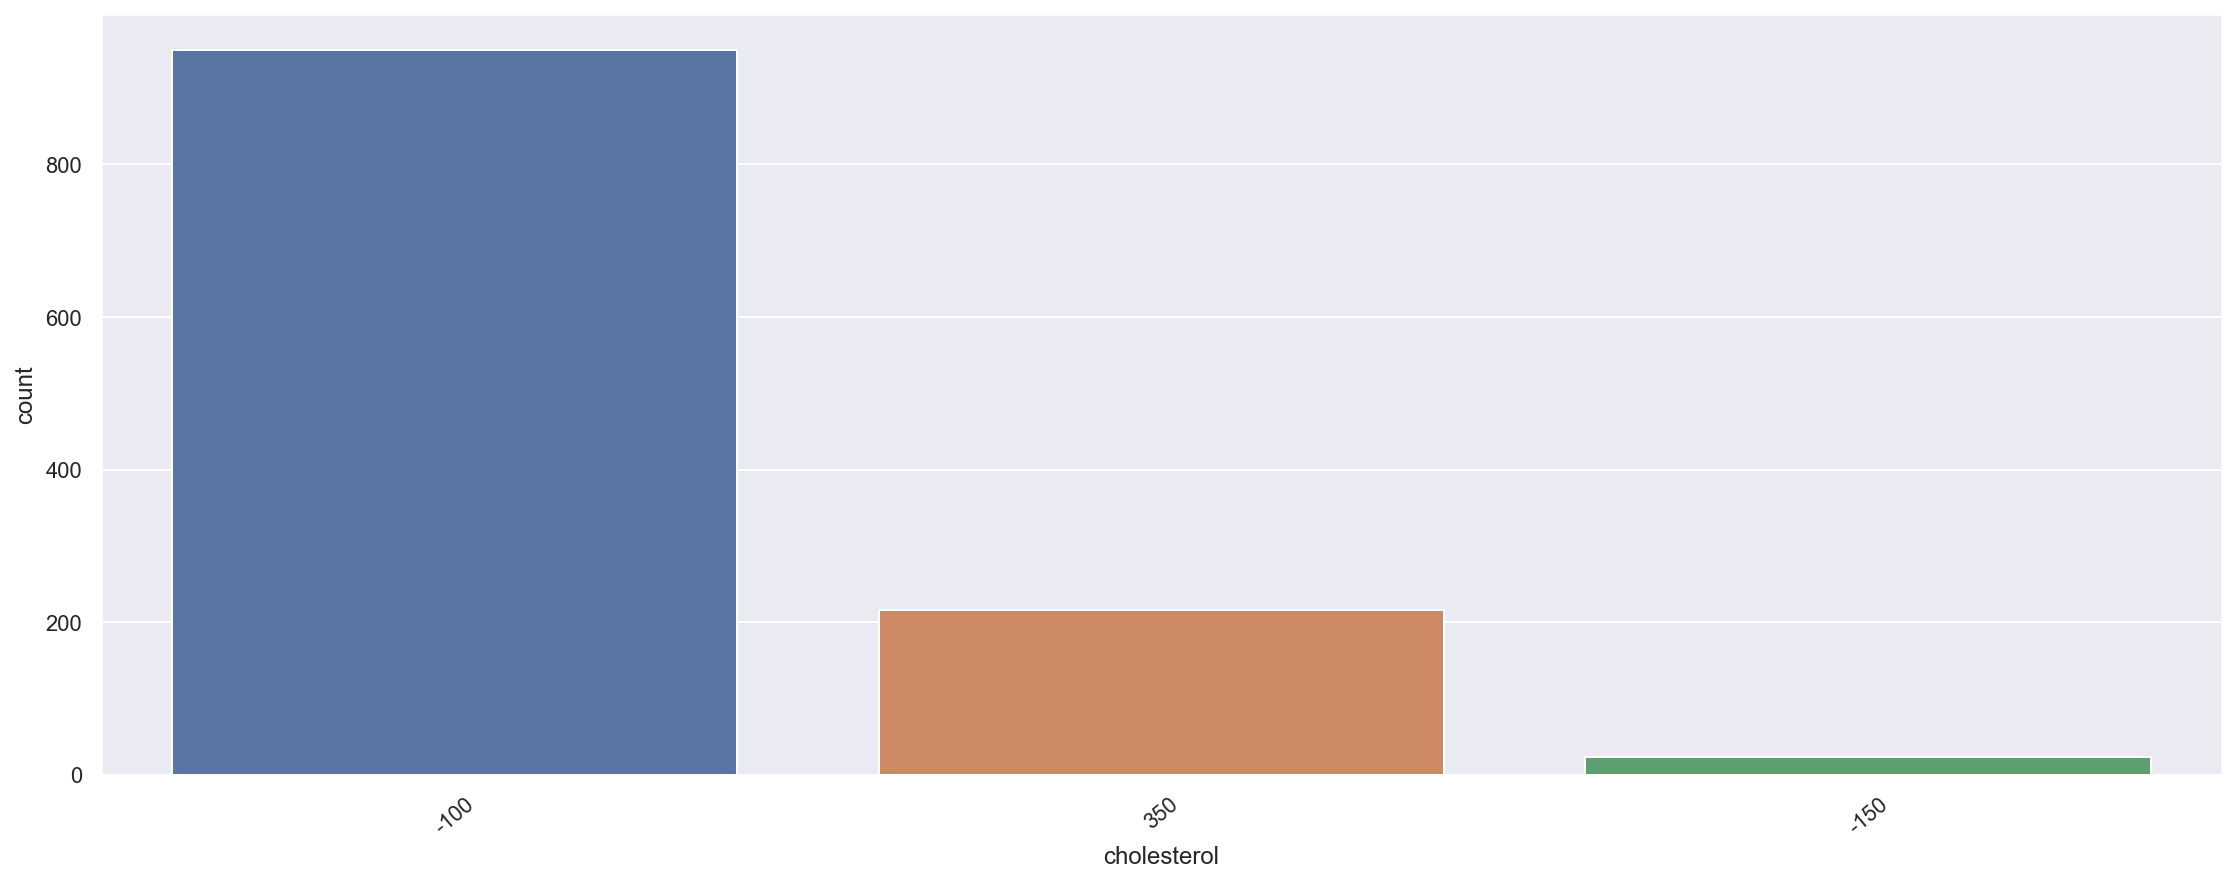

In [144]:
# gráfica de barras, entre distrito y los accidentes ocurridos
fig, ax = plt.subplots(figsize=(19,7))
fig = sns.countplot(x = df['cholesterol'], ax=ax, order = df['cholesterol'].value_counts().index)
#plt.setp(fig.get_xticklabels(), rotation=45)
for item in fig.get_xticklabels():
    item.set_rotation(40)


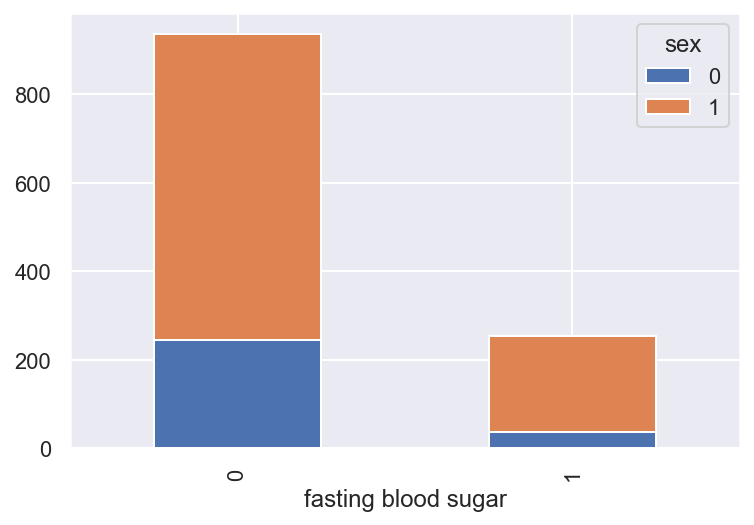

In [145]:
sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
df_plot = df.groupby(['sex', 'fasting blood sugar']).size().reset_index().pivot(columns='sex', index='fasting blood sugar', values=0)
df_plot.plot(kind='bar', stacked=True);

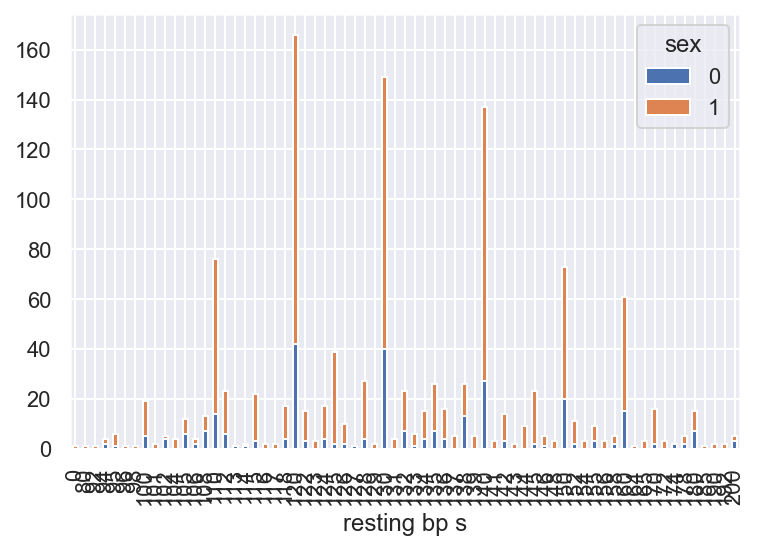

In [146]:
# aqui se representan dentro de las barras los hombres y mujeres con respecto a su habito de fumar
sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
df_plot = df.groupby(['sex', 'resting bp s']).size().reset_index().pivot(columns='sex', index='resting bp s', values=0)
df_plot.plot(kind='bar', stacked=True);

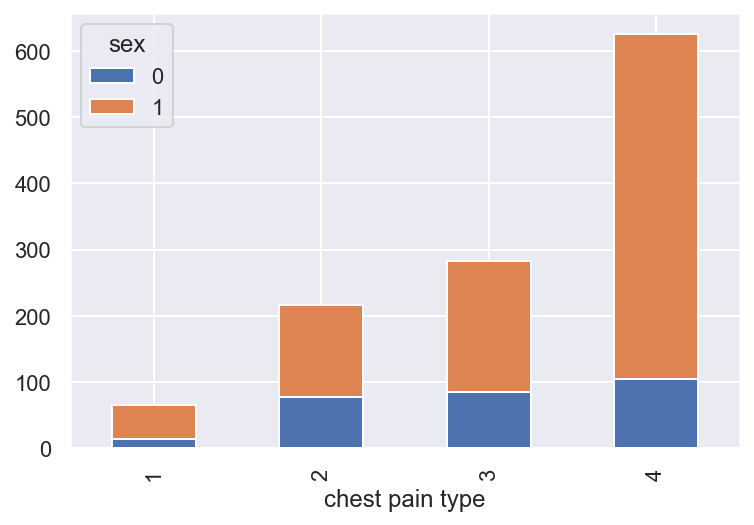

In [147]:
sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
df_plot = df.groupby(['sex', 'chest pain type']).size().reset_index().pivot(columns='sex', index='chest pain type', values=0)
df_plot.plot(kind='bar', stacked=True);

<AxesSubplot:xlabel='sex', ylabel='cholesterol'>

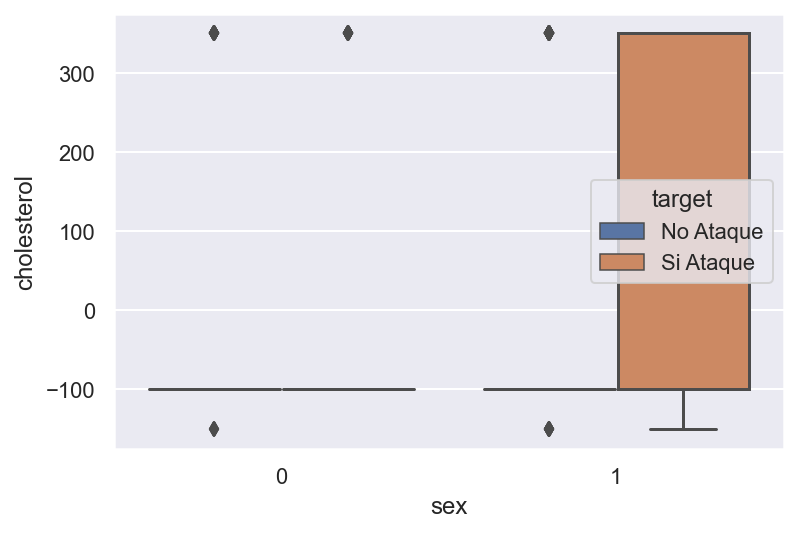

In [148]:
sns.boxplot(data=df,x='sex',y='cholesterol',hue='target')

C:\Users\Data Science\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Data Science\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Data Science\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\D

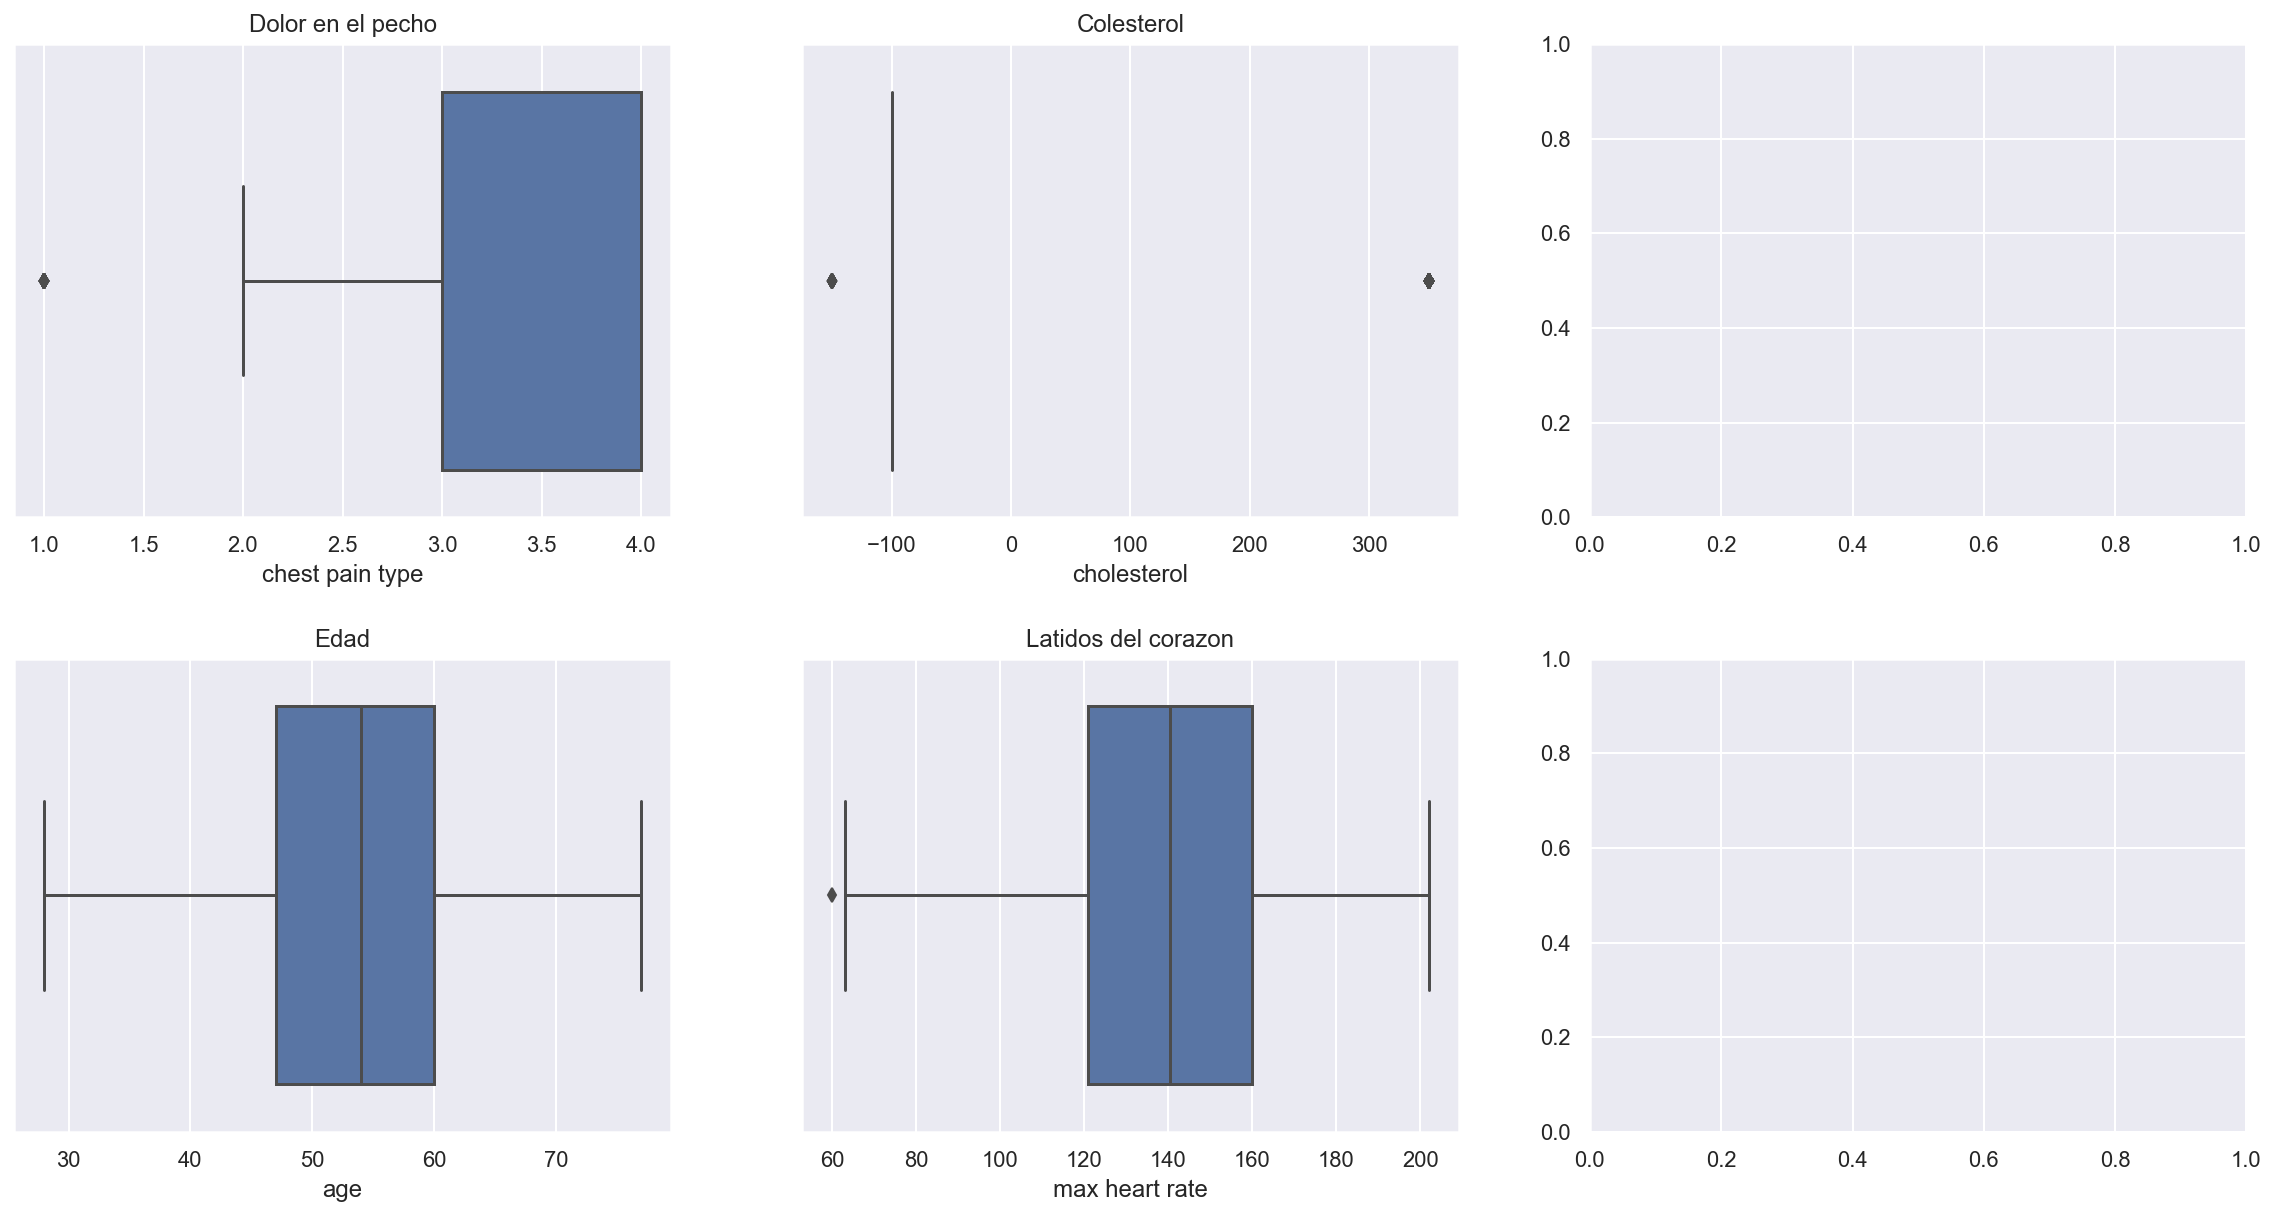

In [149]:

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
plt.subplots_adjust(hspace = 0.3)
# Outliers con boxplot
sns.boxplot(df['chest pain type'], ax=axes[0, 0])
axes[0, 0].set_title("Dolor en el pecho")
sns.boxplot(df['age'], ax=axes[1, 0])
axes[1, 0].set_title("Edad")
sns.boxplot(df['max heart rate'], ax=axes[1, 1])
axes[1, 1].set_title("Latidos del corazon")
sns.boxplot(df['cholesterol'], ax=axes[0, 1])
axes[0, 1].set_title("Colesterol");

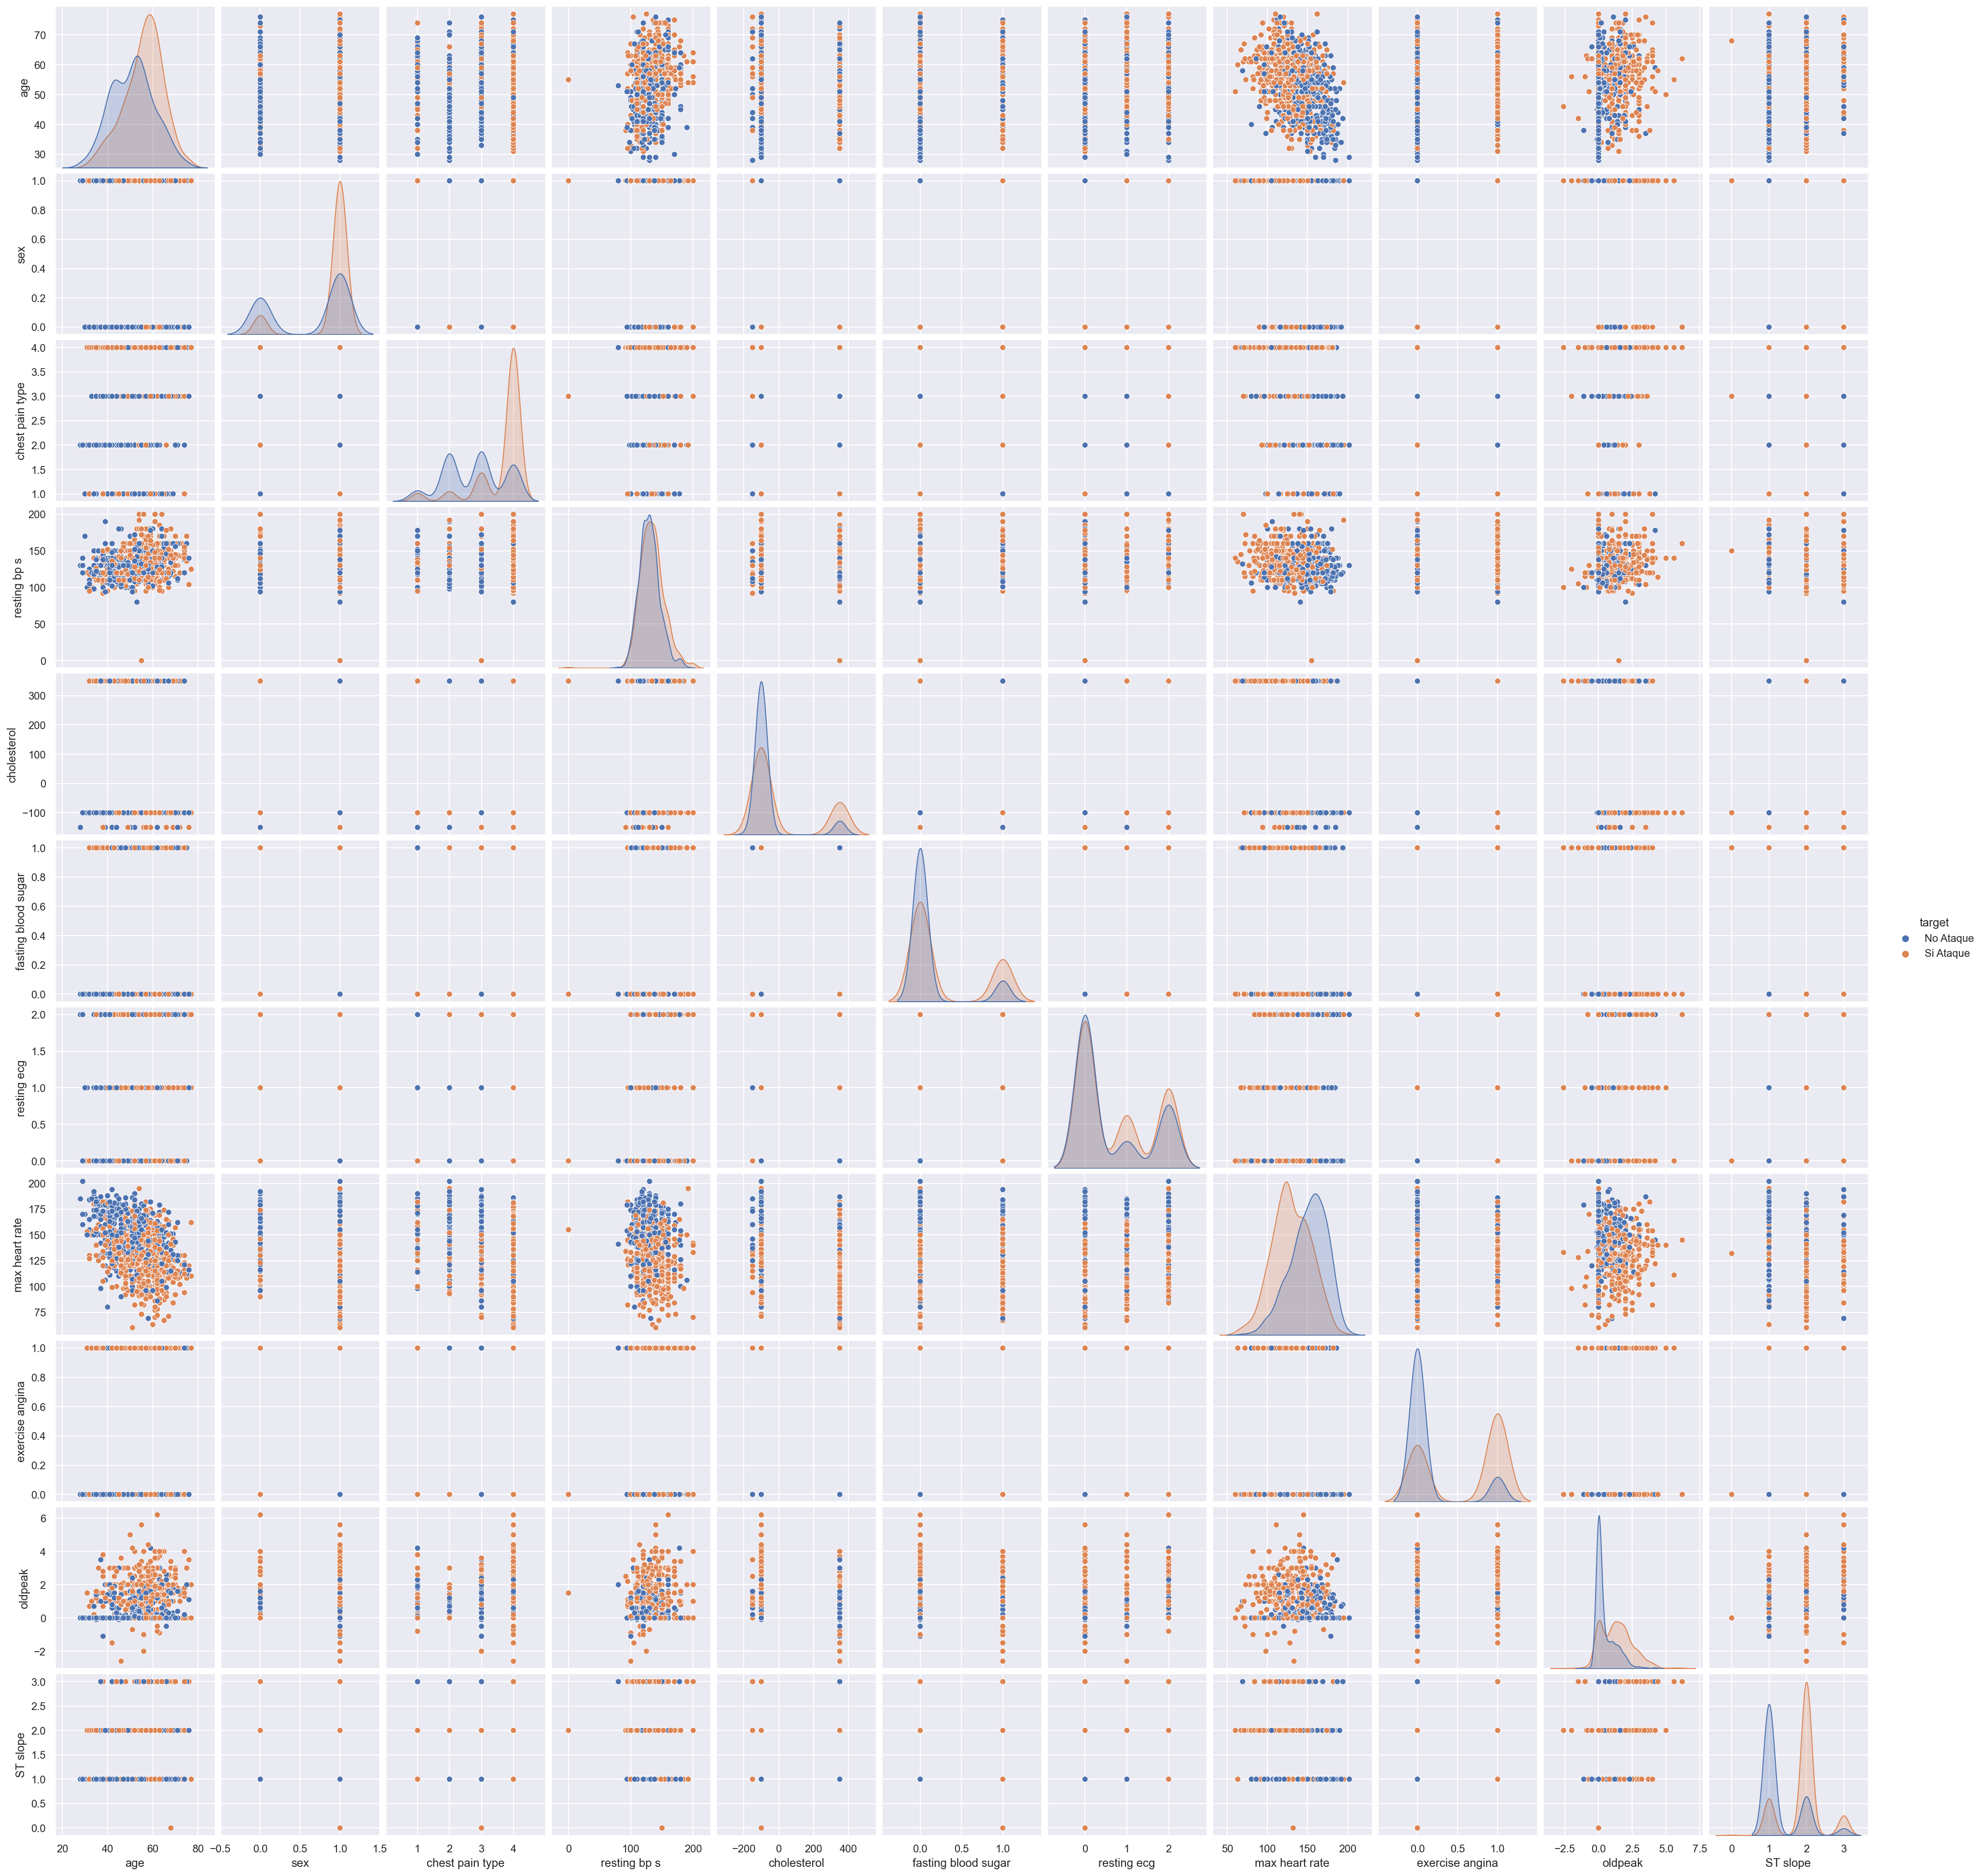

In [182]:
sns.pairplot(df,
            kind='scatter',
            hue='target');
 

In [183]:
df.head()

age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140         -100                    0   
1   49    0                3           160         -100                    0   
2   37    1                2           130         -100                    0   
3   48    0                4           138         -100                    0   
4   54    1                3           150         -100                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope     target  
0            0             172                0      0.0         1  No Ataque  
1            0             156                0      1.0         2  Si Ataque  
2            1              98                0      0.0         1  No Ataque  
3            0             108                1      1.5         2  Si Ataque  
4            0             122                0      0.0         1  No Ataque

In [150]:
df3 = pd.read_csv("heart.csv", sep = ',')

In [151]:
df3[["target"]].astype(int)

target
0          0
1          1
2          0
3          1
4          0
...      ...
1185       1
1186       1
1187       1
1188       1
1189       0

[1190 rows x 1 columns]

In [152]:
X = df3.drop(columns = ['target'])
y = df3.drop('target', 1)

In [153]:
X_train, X_test, y_train, y_test = train_test_split(df3.drop('target', axis=1),
                                                    df3['target'],
                                                    test_size = 0.25,
                                                    random_state = 42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [154]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (892, 11)
Testing split input-  (298, 11)


In [155]:

#Evaluation
precision = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with Decision Tree: {0:.2f}%".format(precision))


Accuracy with Decision Tree: 82.21%


In [156]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))




# no hay signos de overfitting 


Training set score: 0.8307
Test set score: 0.8221


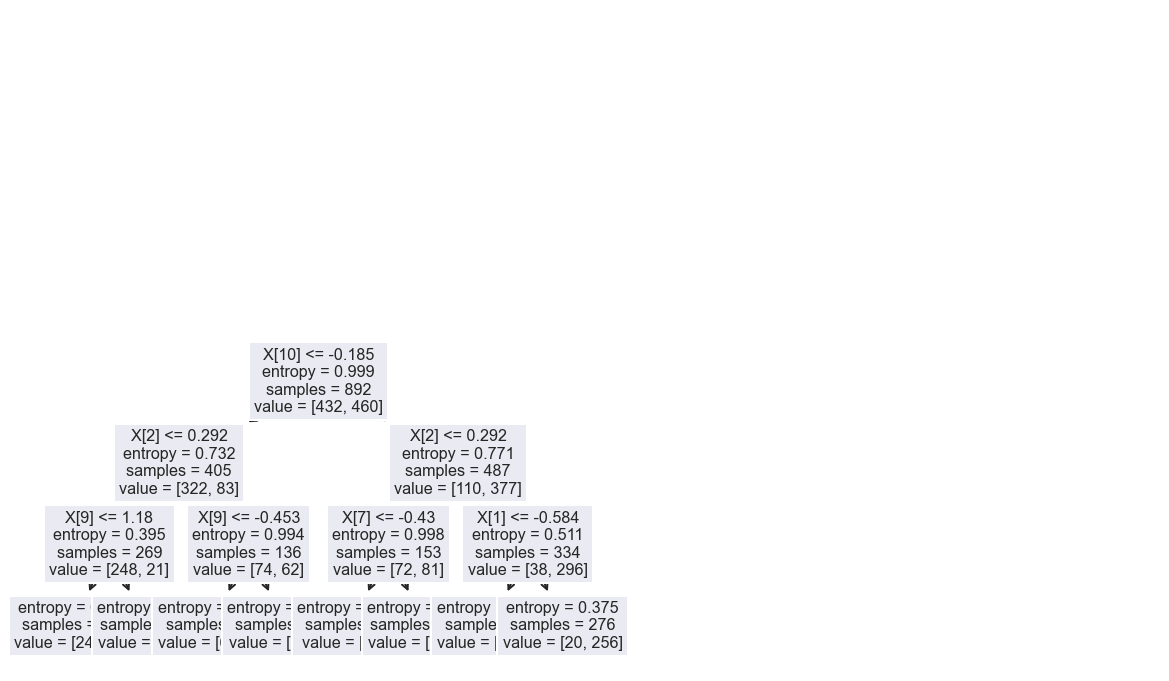

In [157]:
plt.figure(figsize=(10,6))

from sklearn import tree

tree.plot_tree(clf.fit(X_train, y_train));


In [158]:
import os

path_instalacion_graphviz = 'C:/Program Files/Graphviz/bin'

os.environ["PATH"] += os.pathsep + path_instalacion_graphviz

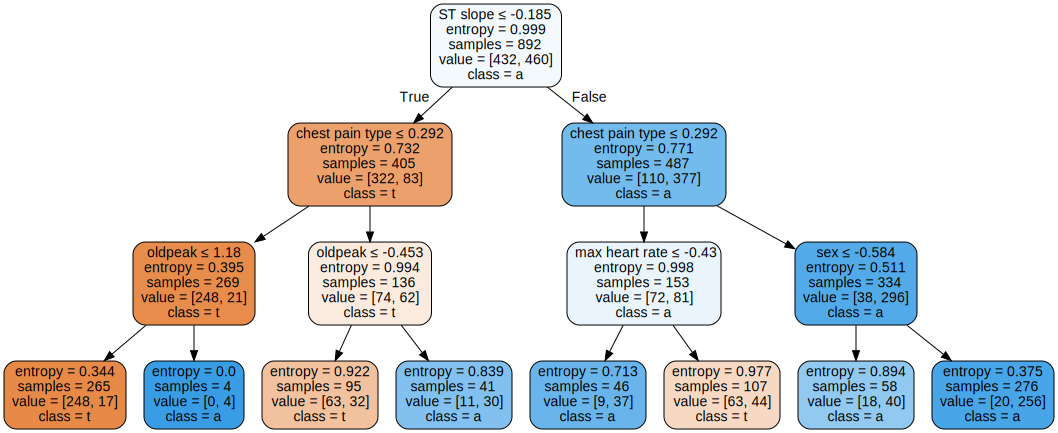

In [159]:
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None, 
                              feature_names= X.columns,  
                              class_names= 'target',  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data, format="png") 

graph 




In [160]:
# Para guardarlo
graph.render("decision_tree_graphivz")

'decision_tree_graphivz.png'

In [161]:
#logistic regresssion
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
X_train, X_test, y_train, y_test = train_test_split(df3.drop('target', axis=1),
                                                    df3['target'], test_size=0.2, random_state=10)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train, y_train)
all_score = model.score(X_test, y_test)


print(all_score)

0.8445378151260504


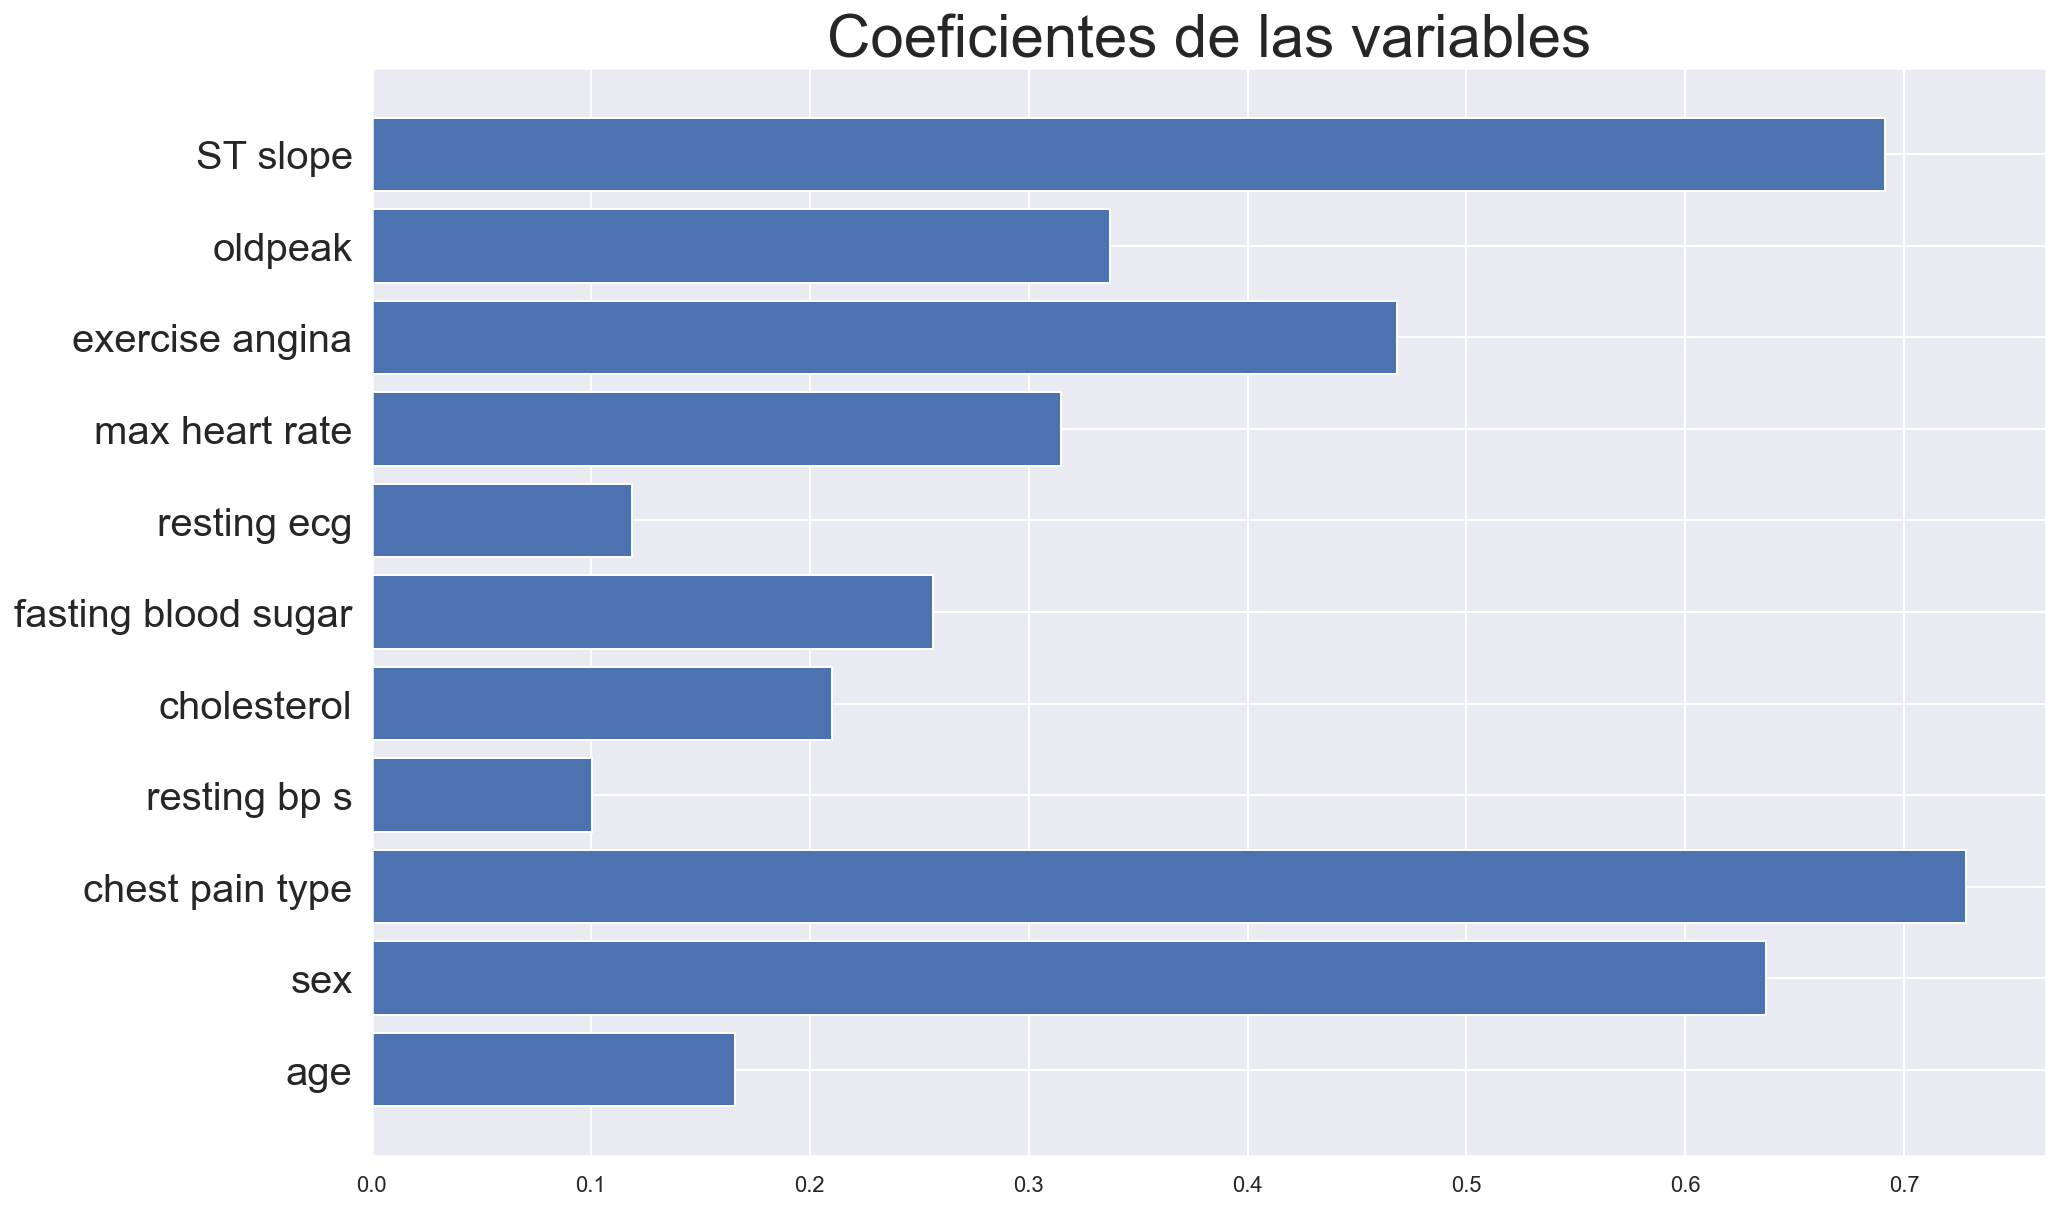

In [162]:
coefs = model.coef_
coefs = coefs[0]
coefsabs = abs(coefs)
labels = X.columns.values
labelsspace = [i.replace('_', ' ') for i in labels]
plt.figure(figsize=(15, 10))
ax = plt.subplot()
plt.barh(range(len(coefsabs)), coefsabs)
ax.set_yticks(range(len(coefs)))
ax.set_yticklabels(labelsspace, fontsize=20)
plt.title('Coeficientes de las variables', fontsize=30)
plt.show()




In [163]:
# instantiating the object

model = LogisticRegression()
# fitting the object
model.fit(X_train, y_train)

# calculating the probabilities
y_pred_proba = model.predict_proba(X_test)

# finding the predicted valued
y_pred = np.argmax(y_pred_proba,axis=1)

# printing the test accuracy
print("The test accuracy score of Logistric Regression is ", accuracy_score(y_test, y_pred))

The test accuracy score of Logistric Regression is  0.8445378151260504


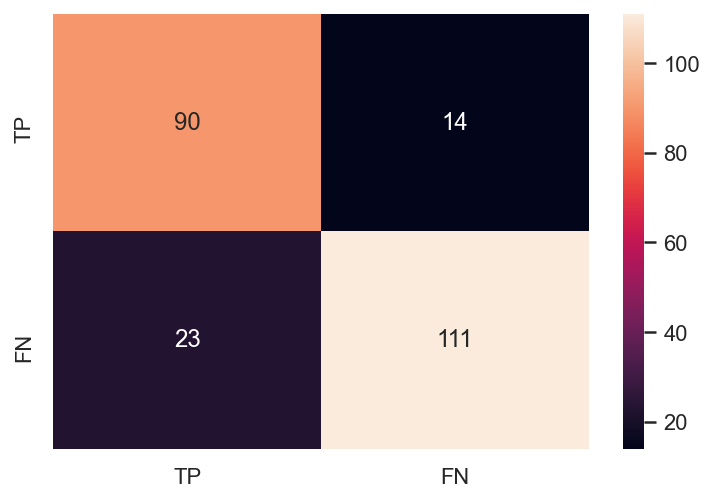

In [164]:
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(y_test, model.predict(X_test))

c_matrix_df = pd.DataFrame(c_matrix,
                          columns = ['TP', 'FN'],
                          index = ['TP', 'FN'])

sns.heatmap(c_matrix_df, annot=True, fmt='g');

In [165]:
#svm
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df3.drop('target', axis=1),
                                                    df3['target'], test_size=0.3,random_state=109)

In [166]:
from sklearn.svm import SVC # "Support vector classifier"

from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel="linear",C=1,random_state = 42) # Linear Kernel
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [167]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8403361344537815


In [168]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.8914285714285715
Recall: 0.8041237113402062


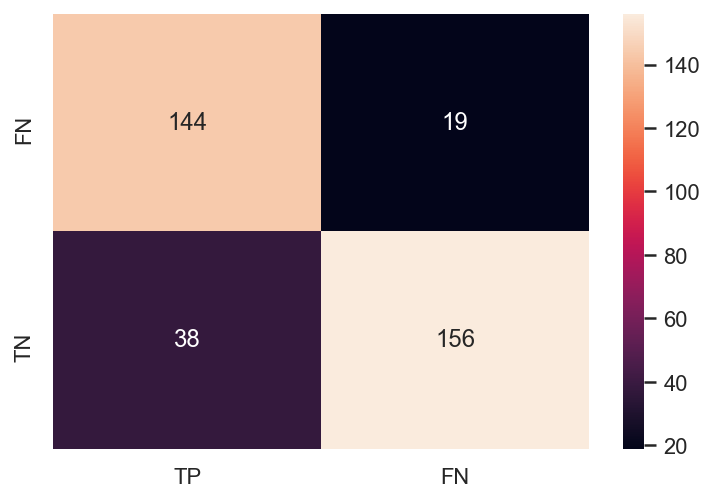

In [169]:
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(y_test, clf.predict(X_test))

c_matrix_df = pd.DataFrame(c_matrix,
                          columns = ['TP', 'FN'],
                          index = ['FN', 'TN'])

sns.heatmap(c_matrix_df, annot=True, fmt='g');

In [170]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

#no hay overfitting

Training set score: 0.8319
Test set score: 0.8403


In [171]:
from sklearn.svm import SVC  
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
pca= PCA(n_components=11, whiten=True, random_state=42)
svm= SVC()
pipe=make_pipeline(pca, svm)

In [172]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df3.drop('target', axis=1),
                                                    df3['target'], random_state=42, test_size=0.3)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [173]:
from sklearn.model_selection import GridSearchCV
param_grid= {"svc__C": [0.1,1,5,10],"svc__gamma":[0.0001,0.0005,0.001,0.005]}
grid=GridSearchCV(pipe,param_grid)
grid.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=11, random_state=42,
                                            whiten=True)),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.1, 1, 5, 10],
                         'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]})

In [174]:
grid.best_params_

{'svc__C': 10, 'svc__gamma': 0.0005}

In [175]:
# instantiating the object and fitting
clf = SVC(kernel='linear', C=10, gamma=0.005, random_state=42).fit(X_train,y_train)

# predicting the values
y_pred = clf.predict(X_test)

# printing the test accuracy
print("The test accuracy score of SVM is ", accuracy_score(y_test, y_pred))

The test accuracy score of SVM is  0.8599439775910365


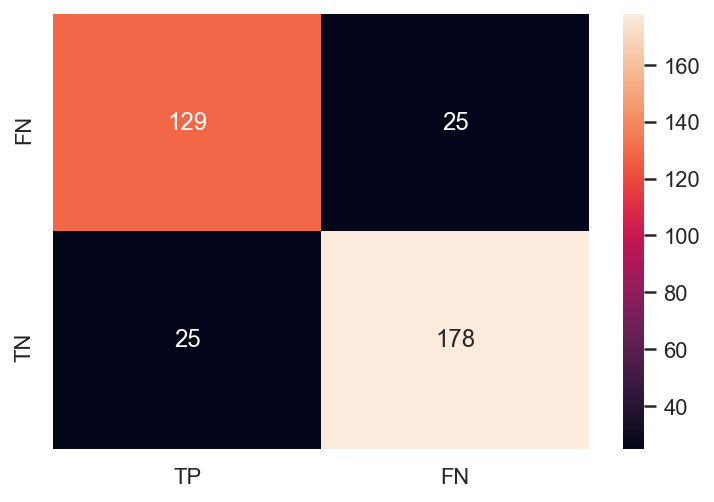

In [177]:
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(y_test, clf.predict(X_test))

c_matrix_df = pd.DataFrame(c_matrix,
                          columns = ['TP', 'FN'],
                          index = ['FN', 'TN'])

sns.heatmap(c_matrix_df, annot=True, fmt='g');


In [178]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

#no hay overfitting

Training set score: 0.8211
Test set score: 0.8599


In [179]:
#gradient boosting clasifier
from sklearn.ensemble import GradientBoostingClassifier

gbct = GradientBoostingClassifier(max_depth=2,
                                 n_estimators=3,
                                 learning_rate=1,
                                 random_state=42)



In [180]:
X_train, X_test, y_train, y_test = train_test_split(df3.drop('target', axis=1),
                                                    df3['target'], random_state=42)

In [181]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [182]:
gbct.fit(X_train, y_train)


y_pred_gbct = gbct.predict(X_test)
accuracy_score(y_test, y_pred_gbct)

0.8523489932885906

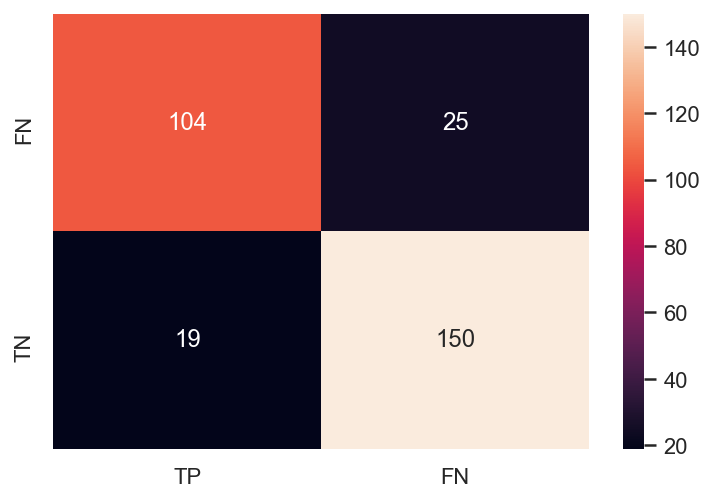

In [183]:
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(y_test, gbct.predict(X_test))

c_matrix_df3 = pd.DataFrame(c_matrix,
                          columns = ['TP', 'FN'],
                          index = ['FN', 'TN'])

sns.heatmap(c_matrix_df3, annot=True, fmt='g');

In [184]:
# neuronal

X_train, X_test, y_train,y_test = train_test_split(df3.drop('target', axis=1),
                                                    df3['target'],test_size=0.3,random_state=42)

In [185]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [186]:
# Initialising the NN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dense
model = Sequential()

# layers
model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 200, validation_split=0.2)

Epoch 1/200
21/21 [==============================] - 1s 18ms/step - loss: 0.6932 - accuracy: 0.4887 - val_loss: 0.6932 - val_accuracy: 0.4850
Epoch 2/200
21/21 [==============================] - 0s 5ms/step - loss: 0.6930 - accuracy: 0.5320 - val_loss: 0.6933 - val_accuracy: 0.4850
Epoch 3/200
21/21 [==============================] - 0s 5ms/step - loss: 0.6930 - accuracy: 0.5137 - val_loss: 0.6933 - val_accuracy: 0.4850
Epoch 4/200
21/21 [==============================] - 0s 5ms/step - loss: 0.6933 - accuracy: 0.4901 - val_loss: 0.6933 - val_accuracy: 0.4850
Epoch 5/200
21/21 [==============================] - 0s 5ms/step - loss: 0.6929 - accuracy: 0.5062 - val_loss: 0.6927 - val_accuracy: 0.4850
Epoch 6/200
21/21 [==============================] - 0s 5ms/step - loss: 0.6911 - accuracy: 0.5013 - val_loss: 0.6869 - val_accuracy: 0.4850
Epoch 7/200
21/21 [==============================] - 0s 5ms/step - loss: 0.6790 - accuracy: 0.5172 - val_loss: 0.6639 - val_accuracy: 0.7246
Epoch 8/200


Epoch 59/200
21/21 [==============================] - 0s 5ms/step - loss: 0.3403 - accuracy: 0.8667 - val_loss: 0.4801 - val_accuracy: 0.7784
Epoch 60/200
21/21 [==============================] - 0s 5ms/step - loss: 0.3355 - accuracy: 0.8613 - val_loss: 0.4804 - val_accuracy: 0.7784
Epoch 61/200
21/21 [==============================] - 0s 5ms/step - loss: 0.3176 - accuracy: 0.8745 - val_loss: 0.4802 - val_accuracy: 0.7784
Epoch 62/200
21/21 [==============================] - 0s 5ms/step - loss: 0.3521 - accuracy: 0.8523 - val_loss: 0.4779 - val_accuracy: 0.7964
Epoch 63/200
21/21 [==============================] - 0s 5ms/step - loss: 0.3418 - accuracy: 0.8611 - val_loss: 0.4786 - val_accuracy: 0.7784
Epoch 64/200
21/21 [==============================] - 0s 5ms/step - loss: 0.3611 - accuracy: 0.8246 - val_loss: 0.4755 - val_accuracy: 0.7784
Epoch 65/200
21/21 [==============================] - 0s 5ms/step - loss: 0.3084 - accuracy: 0.8802 - val_loss: 0.4796 - val_accuracy: 0.7964
Epoch 

21/21 [==============================] - 0s 5ms/step - loss: 0.3224 - accuracy: 0.8561 - val_loss: 0.4623 - val_accuracy: 0.8084
Epoch 117/200
21/21 [==============================] - 0s 5ms/step - loss: 0.3198 - accuracy: 0.8673 - val_loss: 0.4596 - val_accuracy: 0.8084
Epoch 118/200
21/21 [==============================] - 0s 5ms/step - loss: 0.2769 - accuracy: 0.8862 - val_loss: 0.4630 - val_accuracy: 0.8024
Epoch 119/200
21/21 [==============================] - 0s 5ms/step - loss: 0.3476 - accuracy: 0.8516 - val_loss: 0.4602 - val_accuracy: 0.8084
Epoch 120/200
21/21 [==============================] - 0s 5ms/step - loss: 0.2806 - accuracy: 0.8953 - val_loss: 0.4608 - val_accuracy: 0.8024
Epoch 121/200
21/21 [==============================] - 0s 5ms/step - loss: 0.3275 - accuracy: 0.8600 - val_loss: 0.4595 - val_accuracy: 0.8084
Epoch 122/200
21/21 [==============================] - 0s 5ms/step - loss: 0.3233 - accuracy: 0.8748 - val_loss: 0.4610 - val_accuracy: 0.8084
Epoch 123/200

21/21 [==============================] - 0s 5ms/step - loss: 0.2513 - accuracy: 0.8938 - val_loss: 0.4941 - val_accuracy: 0.8024
Epoch 174/200
21/21 [==============================] - 0s 5ms/step - loss: 0.2656 - accuracy: 0.8903 - val_loss: 0.4910 - val_accuracy: 0.8024
Epoch 175/200
21/21 [==============================] - 0s 5ms/step - loss: 0.2720 - accuracy: 0.8897 - val_loss: 0.4933 - val_accuracy: 0.8024
Epoch 176/200
21/21 [==============================] - 0s 5ms/step - loss: 0.2498 - accuracy: 0.8973 - val_loss: 0.4975 - val_accuracy: 0.8024
Epoch 177/200
21/21 [==============================] - 0s 5ms/step - loss: 0.2652 - accuracy: 0.8845 - val_loss: 0.5001 - val_accuracy: 0.8084
Epoch 178/200
21/21 [==============================] - 0s 5ms/step - loss: 0.2589 - accuracy: 0.8985 - val_loss: 0.5000 - val_accuracy: 0.8024
Epoch 179/200
21/21 [==============================] - 0s 5ms/step - loss: 0.2776 - accuracy: 0.8869 - val_loss: 0.4992 - val_accuracy: 0.8144
Epoch 180/200

In [187]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 2ms/step - loss: 0.3879 - accuracy: 0.8627


[0.3879295289516449, 0.8627451062202454]

In [188]:
y_pred = model.predict(X_test)


In [189]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy*100))


val_accuracy: 78.53%


In [190]:
import tensorflow as tf


In [191]:
# neuronal con validacion
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(df3.drop('target', axis=1),
                                                    df3['target'], test_size=0.3)

In [192]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [193]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(833, 11) (178, 11) (179, 11) (833,) (178,) (179,)


In [194]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(11,)),
    Dense(32, activation='sigmoid'),
    Dense(1, activation='sigmoid'),
])

In [195]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [196]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=200,
          validation_data=(X_val, Y_val))

Epoch 1/200
27/27 [==============================] - 1s 14ms/step - loss: 0.6965 - accuracy: 0.5406 - val_loss: 0.6549 - val_accuracy: 0.5449
Epoch 2/200
27/27 [==============================] - 0s 4ms/step - loss: 0.6545 - accuracy: 0.6281 - val_loss: 0.6268 - val_accuracy: 0.6910
Epoch 3/200
27/27 [==============================] - 0s 4ms/step - loss: 0.6247 - accuracy: 0.6916 - val_loss: 0.6426 - val_accuracy: 0.5787
Epoch 4/200
27/27 [==============================] - 0s 4ms/step - loss: 0.6271 - accuracy: 0.6351 - val_loss: 0.6192 - val_accuracy: 0.6854
Epoch 5/200
27/27 [==============================] - 0s 4ms/step - loss: 0.6260 - accuracy: 0.6882 - val_loss: 0.6075 - val_accuracy: 0.7247
Epoch 6/200
27/27 [==============================] - 0s 5ms/step - loss: 0.6343 - accuracy: 0.6580 - val_loss: 0.6374 - val_accuracy: 0.5955
Epoch 7/200
27/27 [==============================] - 0s 4ms/step - loss: 0.6063 - accuracy: 0.6557 - val_loss: 0.6424 - val_accuracy: 0.5843
Epoch 8/200


Epoch 59/200
27/27 [==============================] - 0s 4ms/step - loss: 0.6373 - accuracy: 0.6660 - val_loss: 0.6293 - val_accuracy: 0.5787
Epoch 60/200
27/27 [==============================] - 0s 4ms/step - loss: 0.6298 - accuracy: 0.5879 - val_loss: 0.6208 - val_accuracy: 0.5787
Epoch 61/200
27/27 [==============================] - 0s 4ms/step - loss: 0.6326 - accuracy: 0.5755 - val_loss: 0.6201 - val_accuracy: 0.7697
Epoch 62/200
27/27 [==============================] - 0s 5ms/step - loss: 0.6458 - accuracy: 0.6533 - val_loss: 0.6165 - val_accuracy: 0.7640
Epoch 63/200
27/27 [==============================] - 0s 4ms/step - loss: 0.6375 - accuracy: 0.7156 - val_loss: 0.6154 - val_accuracy: 0.7640
Epoch 64/200
27/27 [==============================] - 0s 4ms/step - loss: 0.6248 - accuracy: 0.7253 - val_loss: 0.6145 - val_accuracy: 0.5787
Epoch 65/200
27/27 [==============================] - 0s 5ms/step - loss: 0.6357 - accuracy: 0.5837 - val_loss: 0.6179 - val_accuracy: 0.5730
Epoch 

27/27 [==============================] - 0s 4ms/step - loss: 0.6380 - accuracy: 0.5917 - val_loss: 0.6361 - val_accuracy: 0.5899
Epoch 117/200
27/27 [==============================] - 0s 4ms/step - loss: 0.6339 - accuracy: 0.5966 - val_loss: 0.6273 - val_accuracy: 0.6517
Epoch 118/200
27/27 [==============================] - 0s 4ms/step - loss: 0.6254 - accuracy: 0.6782 - val_loss: 0.6077 - val_accuracy: 0.7528
Epoch 119/200
27/27 [==============================] - 0s 4ms/step - loss: 0.6260 - accuracy: 0.7090 - val_loss: 0.6077 - val_accuracy: 0.7247
Epoch 120/200
27/27 [==============================] - 0s 5ms/step - loss: 0.6184 - accuracy: 0.6970 - val_loss: 0.6031 - val_accuracy: 0.7584
Epoch 121/200
27/27 [==============================] - 0s 4ms/step - loss: 0.6146 - accuracy: 0.7317 - val_loss: 0.6437 - val_accuracy: 0.5843
Epoch 122/200
27/27 [==============================] - 0s 4ms/step - loss: 0.6539 - accuracy: 0.5780 - val_loss: 0.6481 - val_accuracy: 0.5337
Epoch 123/200

27/27 [==============================] - 0s 4ms/step - loss: 0.7142 - accuracy: 0.5552 - val_loss: 0.6164 - val_accuracy: 0.5787
Epoch 174/200
27/27 [==============================] - 0s 4ms/step - loss: 0.6373 - accuracy: 0.5765 - val_loss: 0.5950 - val_accuracy: 0.5843
Epoch 175/200
27/27 [==============================] - 0s 4ms/step - loss: 0.5955 - accuracy: 0.6074 - val_loss: 0.5894 - val_accuracy: 0.5787
Epoch 176/200
27/27 [==============================] - 0s 4ms/step - loss: 0.6254 - accuracy: 0.6454 - val_loss: 0.5992 - val_accuracy: 0.5787
Epoch 177/200
27/27 [==============================] - 0s 4ms/step - loss: 0.6138 - accuracy: 0.6504 - val_loss: 0.5617 - val_accuracy: 0.7584
Epoch 178/200
27/27 [==============================] - 0s 4ms/step - loss: 0.5877 - accuracy: 0.7096 - val_loss: 0.6829 - val_accuracy: 0.5337
Epoch 179/200
27/27 [==============================] - 0s 4ms/step - loss: 0.6737 - accuracy: 0.5412 - val_loss: 0.5859 - val_accuracy: 0.7921
Epoch 180/200

In [197]:
model.evaluate(X_test, Y_test)[1]

6/6 [==============================] - 0s 2ms/step - loss: 0.6228 - accuracy: 0.6201


0.6201117038726807

In [198]:
import matplotlib.pyplot as plt

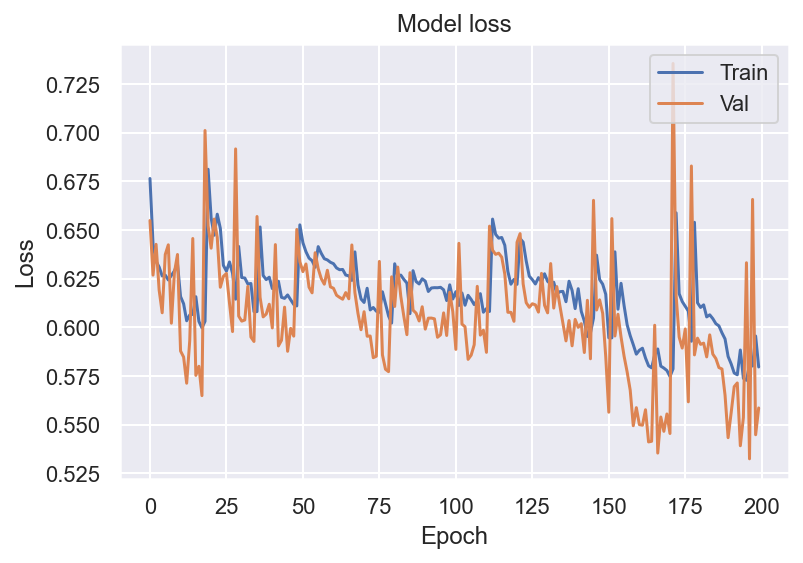

In [199]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()